___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

**1. Відкрийте файл та виведіть описову статистику**

In [2]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.**

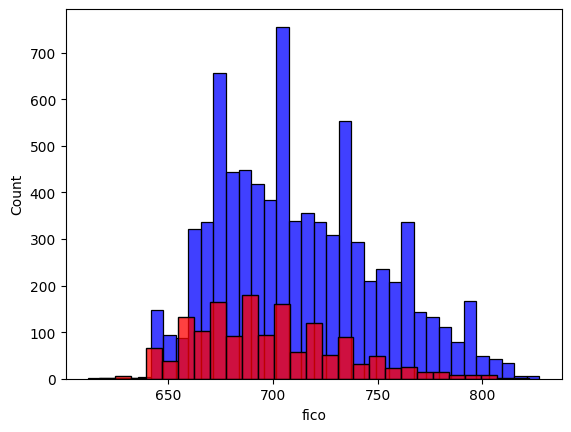

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df0 = df[df['not.fully.paid'] == 0]
df1 = df[df['not.fully.paid'] == 1]

sns.histplot(df0['fico'], color='blue')
sns.histplot(df1['fico'], color='red')
plt.show()

**3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot**

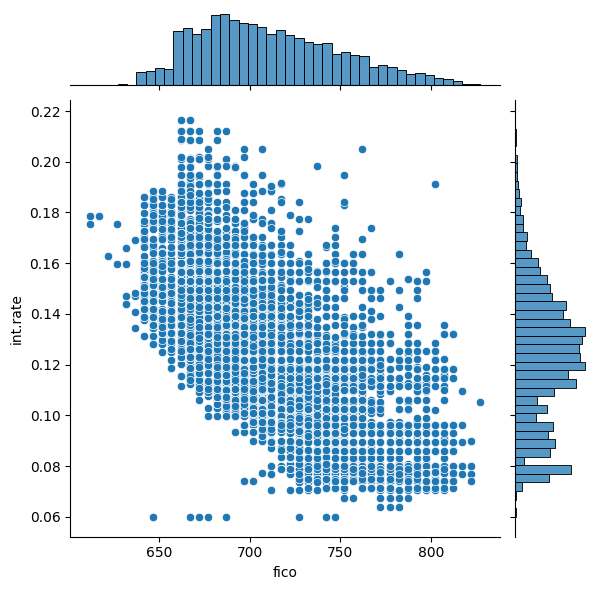

In [4]:
sns.jointplot(data=df, x="fico", y="int.rate")

**4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції**

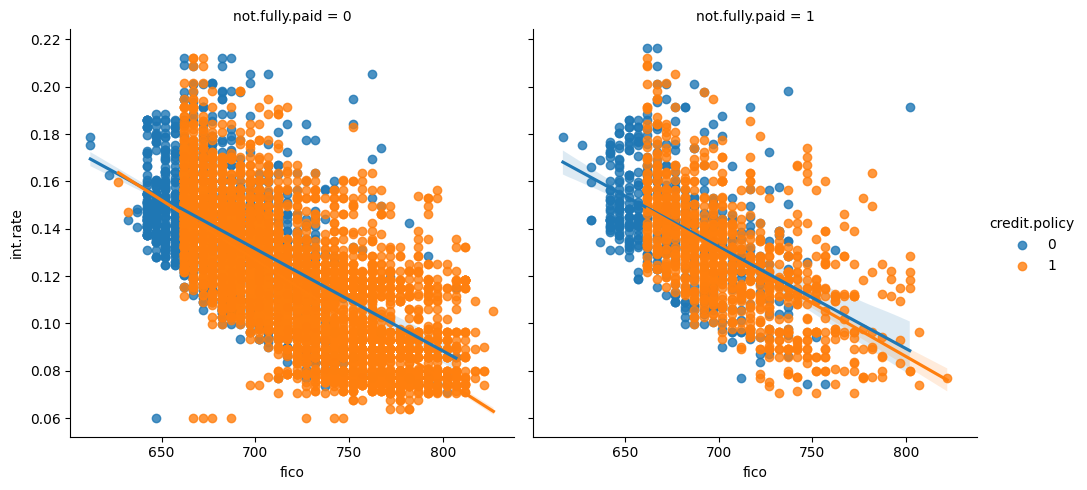

In [5]:
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid')

**5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies**

In [6]:
df = pd.get_dummies(df, columns=['purpose'])

**6. Розбийте датасет на тестві та трейнові дані**

In [7]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost**

*дерево рішень*

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

print('Score на трейні', model_tree.score(X_train,y_train))
print('Score на тесті', model_tree.score(X_test,y_test))

Score на трейні 1.0
Score на тесті 0.7526096033402923


*логістична регресія*

In [10]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

print('Score на трейні', logmodel.score(X_train,y_train))
print('Score на тесті', logmodel.score(X_test,y_test))

Score на трейні 0.8394675019577134
Score на тесті 0.8418580375782881


*random forest*

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_rand = RandomForestClassifier()
model_rand.fit(X_train, y_train)

print('Score на трейні', model_rand.score(X_train,y_train))
print('Score на тесті', model_rand.score(X_test,y_test))

Score на трейні 0.9998694857739494
Score на тесті 0.8413361169102297


*XGBoost*

In [12]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train, y_train)

print ('Score на трейні', xgb_class.score(X_train, y_train))
print ('Score на тесті', xgb_class.score(X_test, y_test))

Score на трейні 0.9451840250587314
Score на тесті 0.8366388308977035


**8. Для кожної з моделей виведіть матрицю, основні метрики**






*дерево рішень*

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_tree.predict(X_test)

# Матриця помилок
cm_tree = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm_tree)

# Основні метрики класифікації
report_tree = classification_report(y_test, y_pred)
print('Classification report:\n', report_tree)

Confusion matrix:
 [[1370  243]
 [ 231   72]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1613
           1       0.23      0.24      0.23       303

    accuracy                           0.75      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.76      0.75      0.75      1916



*логістична регресія*

In [14]:
y_pred = logmodel.predict(X_test)

# Матриця помилок
cm_log = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm_log)

# Основні метрики класифікації
report_log = classification_report(y_test, y_pred)
print('Classification report:\n', report_log)

Confusion matrix:
 [[1613    0]
 [ 303    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1613
           1       0.00      0.00      0.00       303

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

*random forest*

In [15]:
y_pred = model_rand.predict(X_test)

# Матриця помилок
cm_rand = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm_rand)

# Основні метрики класифікації
report_rand = classification_report(y_test, y_pred)
print('Classification report:\n', report_rand)

Confusion matrix:
 [[1605    8]
 [ 296    7]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1613
           1       0.47      0.02      0.04       303

    accuracy                           0.84      1916
   macro avg       0.66      0.51      0.48      1916
weighted avg       0.78      0.84      0.78      1916



*XGBoost*

In [16]:
y_pred = xgb_class.predict(X_test)

# Матриця помилок
cm_xgb = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm_xgb)

# Основні метрики класифікації
report_xgb = classification_report(y_test, y_pred)
print('Classification report:\n', report_xgb)

Confusion matrix:
 [[1578   35]
 [ 278   25]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1613
           1       0.42      0.08      0.14       303

    accuracy                           0.84      1916
   macro avg       0.63      0.53      0.52      1916
weighted avg       0.78      0.84      0.79      1916



**9. Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)**

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model_tree, X_train, y_train, target_name='target', feature_names=X_train.columns.tolist())
viz.view()

**10. Використайте ансамбель voting для всіх моделей**

In [18]:
from sklearn.ensemble import VotingClassifier

# Визначення списку моделей
models = [('дерево рішень', model_tree), ('логістична регресія', logmodel), ('random forest', model_rand), ('XGBoost', xgb_class)]

# Створення VotingClassifier
ensemble = VotingClassifier(estimators=models, voting='hard')

# тренувати модель на тренувальному наборі
ensemble.fit(X_train, y_train)

# точність моделі на тренувальному та тестовому наборах даних
print('Score на трейні', ensemble.score(X_train, y_train))
print('Score на тесті', ensemble.score(X_test, y_test))

# точність моделі на тренувальному та тестовому наборах даних
y_pred = ensemble.predict(X_test)

# мтриця помилок та основні метрики
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Score на трейні 0.9451840250587314
Score на тесті 0.8434237995824635
[[1613    0]
 [ 300    3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1613
           1       1.00      0.01      0.02       303

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.47      1916
weighted avg       0.87      0.84      0.77      1916



**11. Порівняйте результати моделей та зробіть висновки**

Найнижчий показник у логістичної регресії, найвищий - random forest

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [ ]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [19]:
data = pd.read_csv('air_quality_no2_long.csv')

In [20]:
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


**Виведіть список унікальних міст з датасету**

In [21]:
unique_cities= data['city'].unique()
unique_cities

array(['Paris', 'Antwerpen', 'London'], dtype=object)

**Виведіть дату початку та кінця ведення даних**

In [22]:
print (min(data['date.utc']))
print (max(data['date.utc']))

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00


**Яка середня конценрація  𝑁𝑂2 для кожного дня тижня і міста (виведіть таблицю)?**

In [23]:
data['date.utc'] = pd.to_datetime(data['date.utc'])
data['weekday'] = data['date.utc'].dt.weekday

result = data.groupby(['city', 'weekday'])['value'].mean()

print(result)

city       weekday
Antwerpen  0          27.875000
           1          22.214286
           2          21.125000
           3          27.500000
           4          28.400000
           5          33.500000
           6          21.896552
London     0          23.969697
           1          24.885714
           2          23.460432
           3          24.780142
           4          26.446809
           5          24.977612
           6          24.859155
Paris      0          24.856250
           1          30.999359
           2          29.165753
           3          28.600690
           4          31.617986
           5          25.266154
           6          23.274306
Name: value, dtype: float64


**Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?**

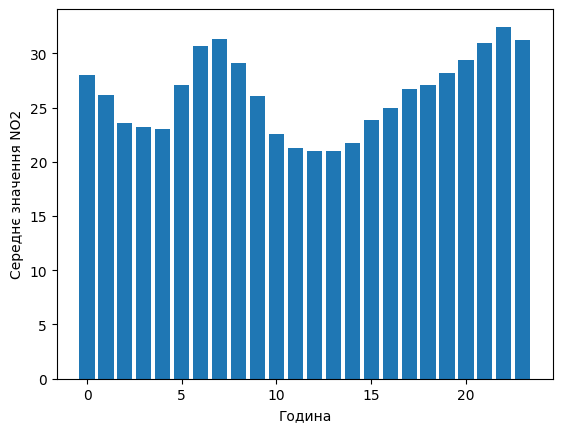

In [24]:
import matplotlib.pyplot as plt

hourly_mean = data.groupby(data['date.utc'].dt.hour)['value'].mean()

plt.bar(hourly_mean.index, hourly_mean.values)
plt.xlabel('Година')
plt.ylabel('Середнє значення NO2')
plt.show()